In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse 
import csv
import os
import re

BASE_URL = 'https://genshin-builds.com'
WEAPONS_URL = urljoin(BASE_URL, "/en/weapons")
WEAPONS_PATH = '../data/weapons.csv'
IMAGE_DIR = '../images/weapon_icons' 

os.makedirs(os.path.dirname(WEAPONS_PATH), exist_ok=True)
os.makedirs(IMAGE_DIR, exist_ok=True)
print(f"Data will be saved to: {WEAPONS_PATH}")
print(f"Images will be saved to: {IMAGE_DIR}\n")

response = requests.get(WEAPONS_URL)
soup = BeautifulSoup(response.content, 'html.parser')
weapon_links = soup.select('a[href^="/en/weapon"]')[2:]
weapon_links = [urljoin(BASE_URL, w['href']) for w in weapon_links]

weapons_data = []

for link in weapon_links:
    print(f"Scraping: {link}")
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    #weapon name
    name_element = soup.select_one('h1')
    name = name_element.get_text(strip=True).replace('Genshin Impact', '').replace('Weapon', '').strip() if name_element else "N/A"

    #type
    type_element = soup.select_one('div.flex-wrap span img')
    weapon_type = type_element['alt'] if type_element else "N/A"

    #rarity
    rarity = "N/A"
    rarity_container = soup.select_one('div[class*="genshin-bg-rarity-"]')
    if rarity_container:
        rarity_class = next((cls for cls in rarity_container['class'] if 'genshin-bg-rarity-' in cls), None)
        if rarity_class:
            rarity = int(rarity_class.split('-')[-1])

    #download icon
    icon_element = soup.select_one('div.relative.mb-3.flex-none img')
    icon_url = icon_element['src'] if icon_element else None
    icon_path = "N/A"

    if icon_url:
        try:
            sanitized_name = re.sub(r'[\\/*?:"<>|]', "", name).replace(' ', '_').lower()
    
            parsed_url = urlparse(icon_url)
            clean_path = parsed_url.path
            file_extension = os.path.splitext(clean_path)[1] or '.png'
            
            filename = f"{sanitized_name}{file_extension}"
            icon_path = os.path.join(IMAGE_DIR, filename)

            img_response = requests.get(icon_url)
            img_response.raise_for_status()

            with open(icon_path, 'wb') as f:
                f.write(img_response.content)
            print(f"  -> Downloaded icon to {icon_path}")

        except requests.exceptions.RequestException as e:
            print(f"  -> 🚨 Failed to download {icon_url}: {e}")
            icon_path = "N/A"

    weapon_info = {
        'name': name,
        'type': weapon_type,
        'rarity': rarity,
        'icon_path': icon_path
    }
    weapons_data.append(weapon_info)

if weapons_data:
    with open(WEAPONS_PATH, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['name', 'type', 'rarity', 'icon_path']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerows(weapons_data)
    
    print(f"\n✅ Success! Scraped data for {len(weapons_data)} weapons and saved to {WEAPONS_PATH}")

Data will be saved to: ../data/weapons.csv
Images will be saved to: ../images/weapon_icons

Scraping: https://genshin-builds.com/en/weapon/a_thousand_blazing_suns
  -> Downloaded icon to ../images/weapon_icons/a_thousand_blazing_suns.png
Scraping: https://genshin-builds.com/en/weapon/a_thousand_floating_dreams
  -> Downloaded icon to ../images/weapon_icons/a_thousand_floating_dreams.png
Scraping: https://genshin-builds.com/en/weapon/absolution
  -> Downloaded icon to ../images/weapon_icons/absolution.png
Scraping: https://genshin-builds.com/en/weapon/amos_bow
  -> Downloaded icon to ../images/weapon_icons/amos'_bow.png
Scraping: https://genshin-builds.com/en/weapon/aqua_simulacra
  -> Downloaded icon to ../images/weapon_icons/aqua_simulacra.png
Scraping: https://genshin-builds.com/en/weapon/aquila_favonia
  -> Downloaded icon to ../images/weapon_icons/aquila_favonia.png
Scraping: https://genshin-builds.com/en/weapon/astral_vultures_crimson_plumage
  -> Downloaded icon to ../images/weap

<!DOCTYPE html>
<html lang="en"> <head><meta content="184302aed06fab35603b7bdc3642ec61-093ccb5f6fa133d4-1" name="sentry-trace"/>
<meta content="sentry-environment=production,sentry-release=9016d4a64b1d649b74b048fbaf09f362ae24b36d,sentry-public_key=9c7422fbfed53fb87f55bc455bb22a83,sentry-trace_id=184302aed06fab35603b7bdc3642ec61,sentry-org_id=95426,sentry-transaction=GET%20%2F%5Blang%5D%2Fweapon%2F%5Bid%5D,sentry-sampled=true,sentry-sample_rand=0.008060352716249497,sentry-sample_rate=1" name="baggage"/>
<meta content="%2F%5Blang%5D%2Fweapon%2F%5Bid%5D" name="sentry-route-name"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Astro v5.14.1" name="generator"/><link href="https://genshin-builds.com/sitemap.xml" rel="alternate" title="RSS Feed for Genshin Builds" type="application/rss+xml"/><script type="application/ld+json">{"@context":"https://schema.org","@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1
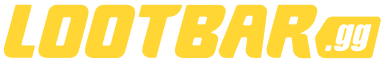

In [4]:
soup